In [317]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math
import PIL
import scipy

from skimage import color, data, restoration

In [318]:
blur=PIL.Image.open("blurry1.jpg")

In [319]:
blur_array=np.array(blur)
blur_array.shape

blur_red_channel=np.zeros([467,700])
blur_red_channel=blur_array[:,:,0]

In [320]:
blur_red_channel

array([[151, 151, 151, ..., 132, 132, 132],
       [152, 152, 152, ..., 132, 132, 132],
       [152, 152, 152, ..., 132, 133, 133],
       ..., 
       [139, 140, 140, ..., 135, 136, 136],
       [139, 140, 140, ..., 134, 134, 134],
       [138, 139, 139, ..., 134, 134, 134]], dtype=uint8)

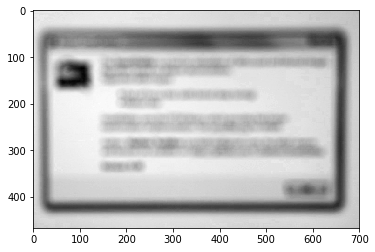

In [321]:
plt.imshow(blur_red_channel,cmap='gray')
plt.show()

In [334]:
dimlist=np.arange(1,16)

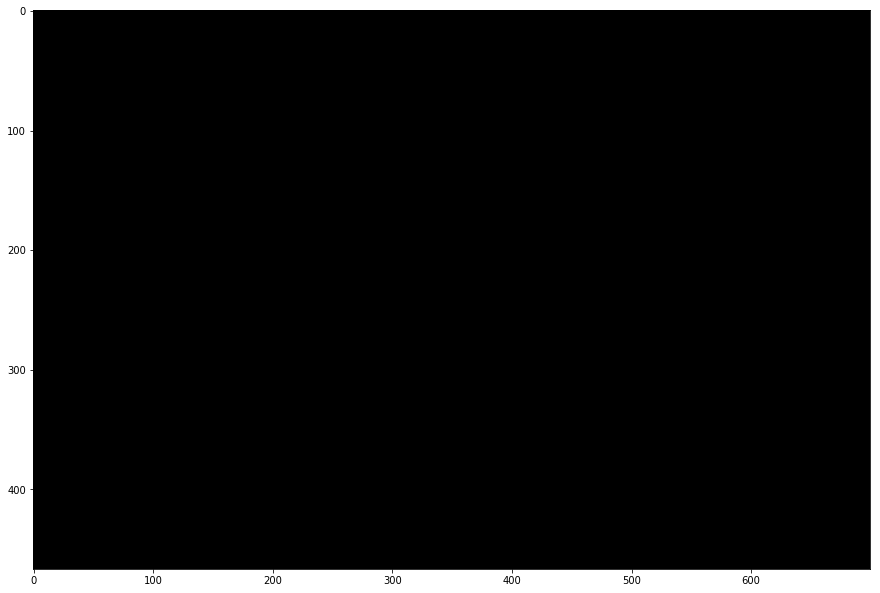

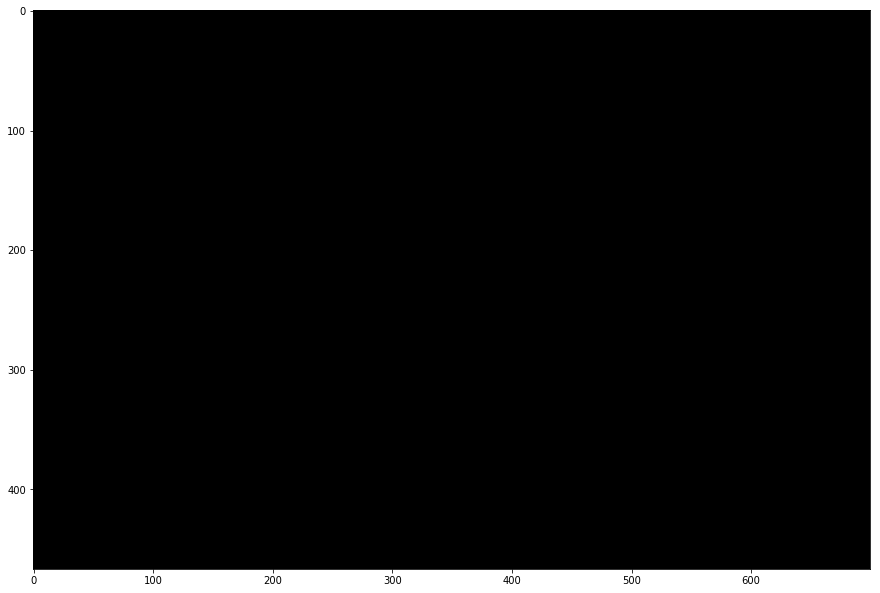

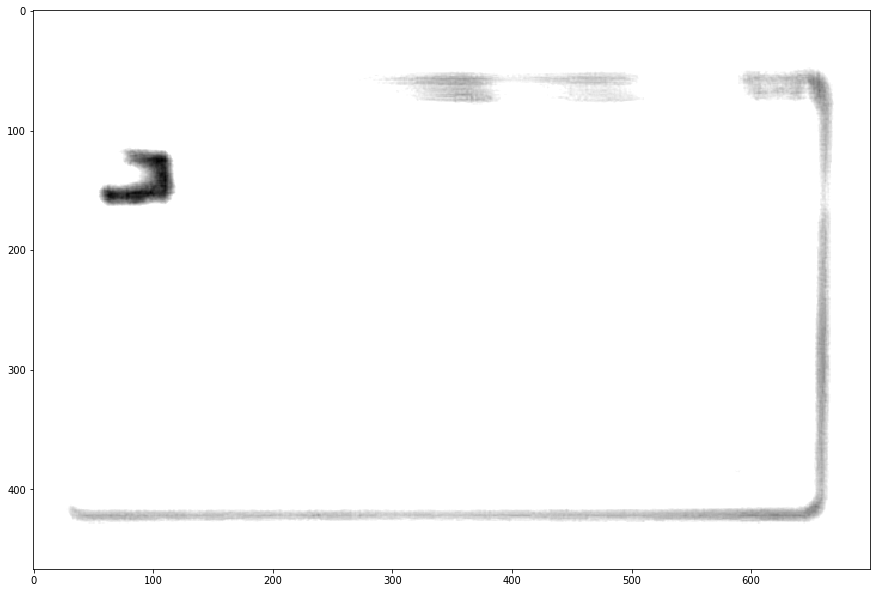

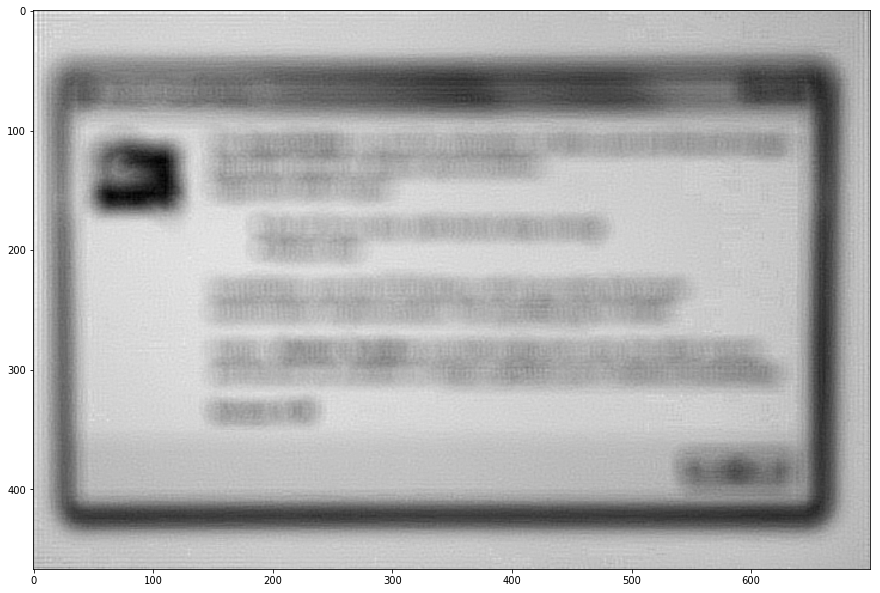

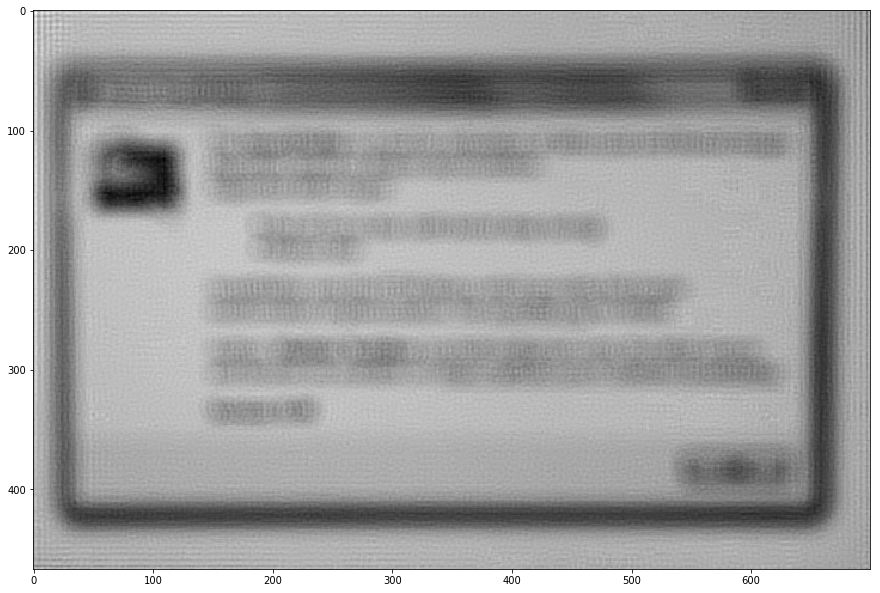

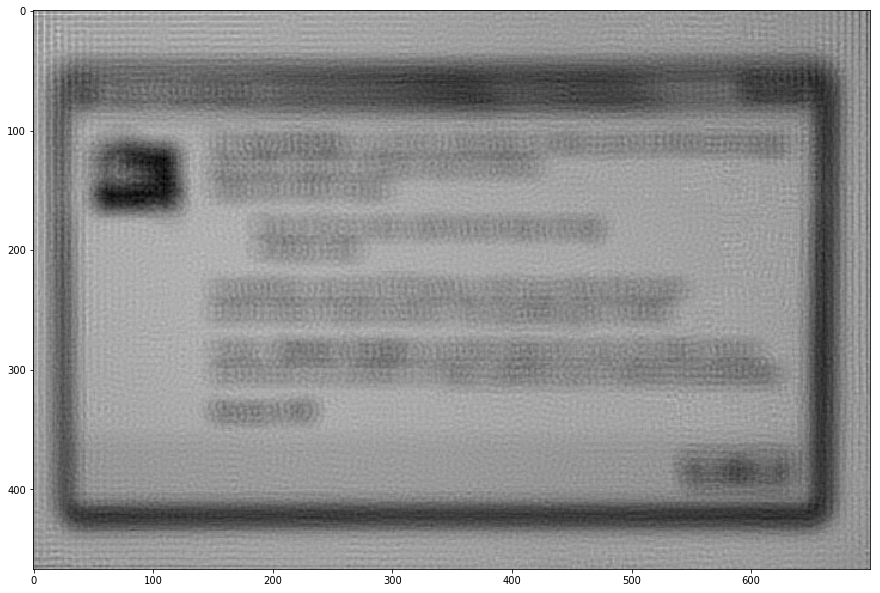

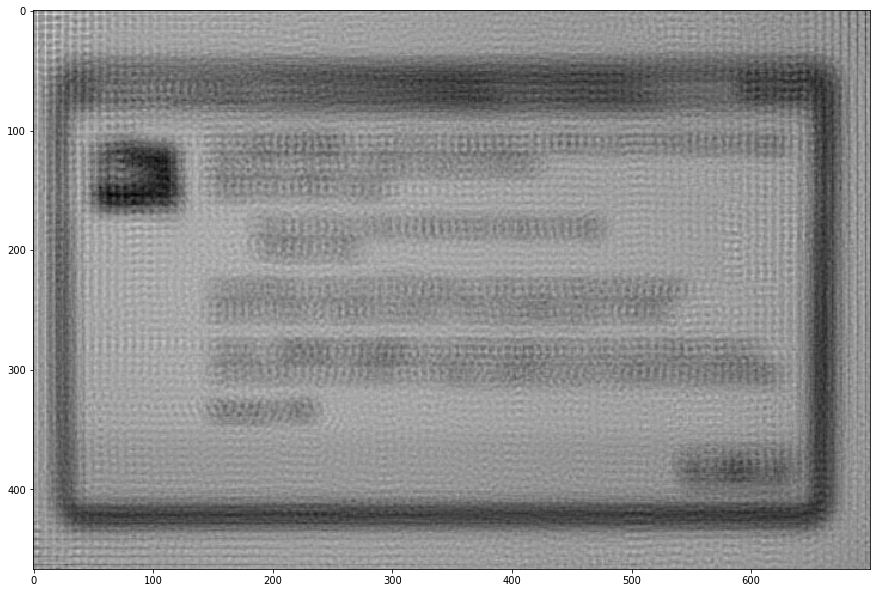

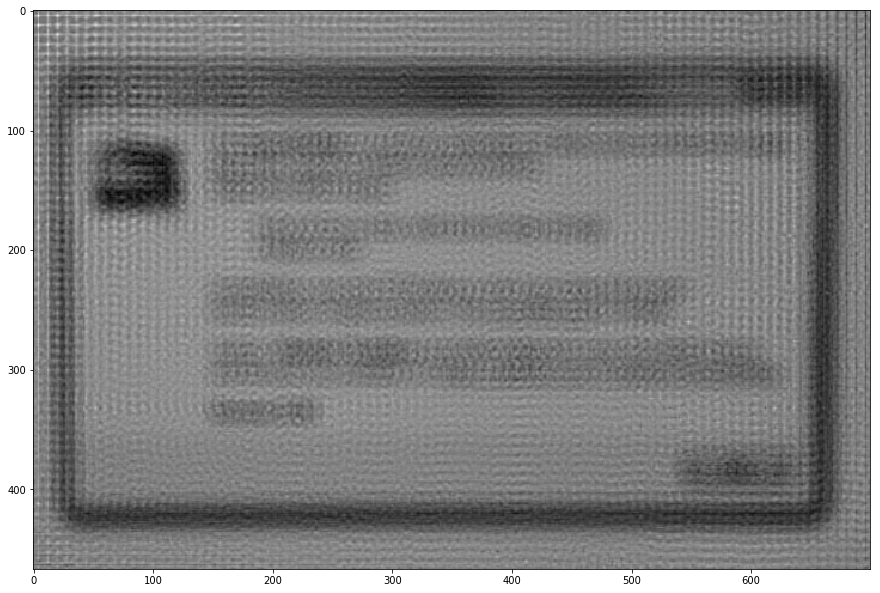

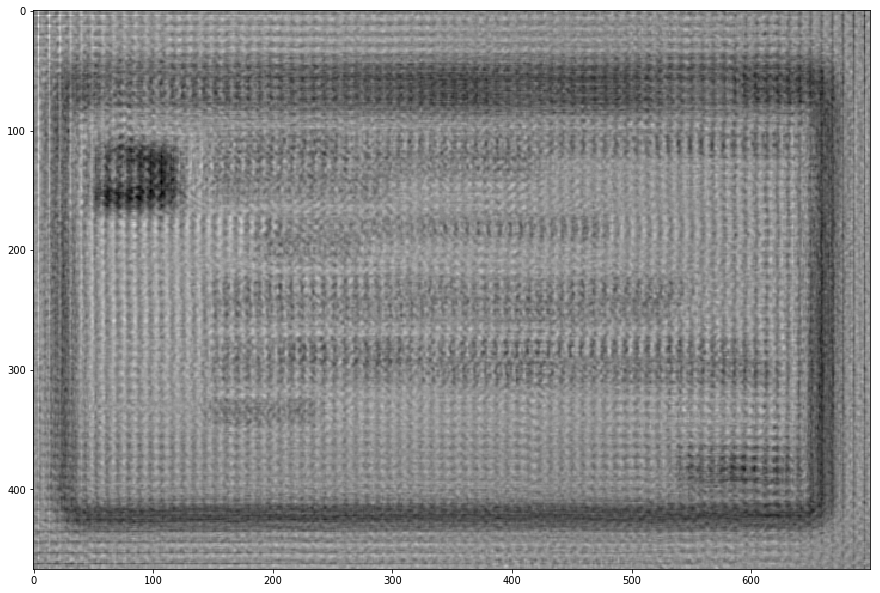

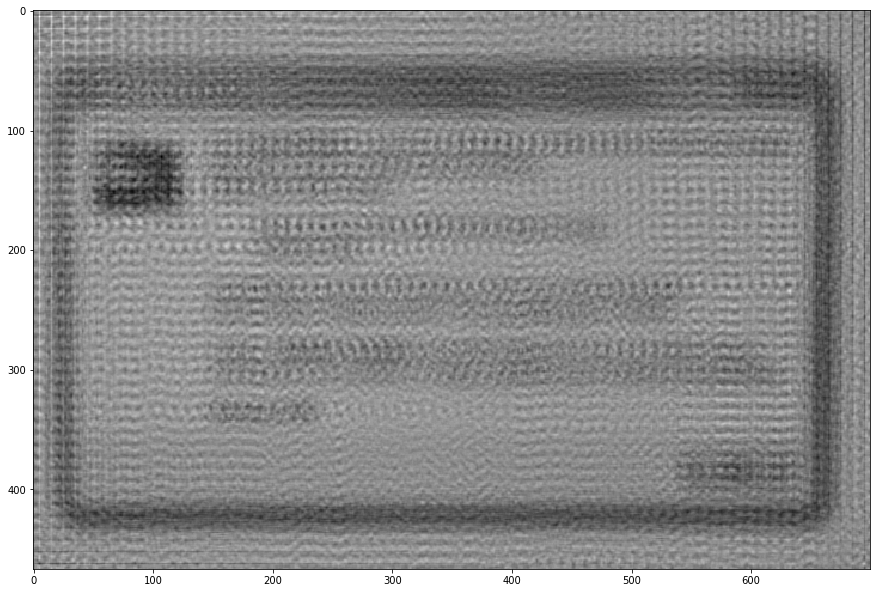

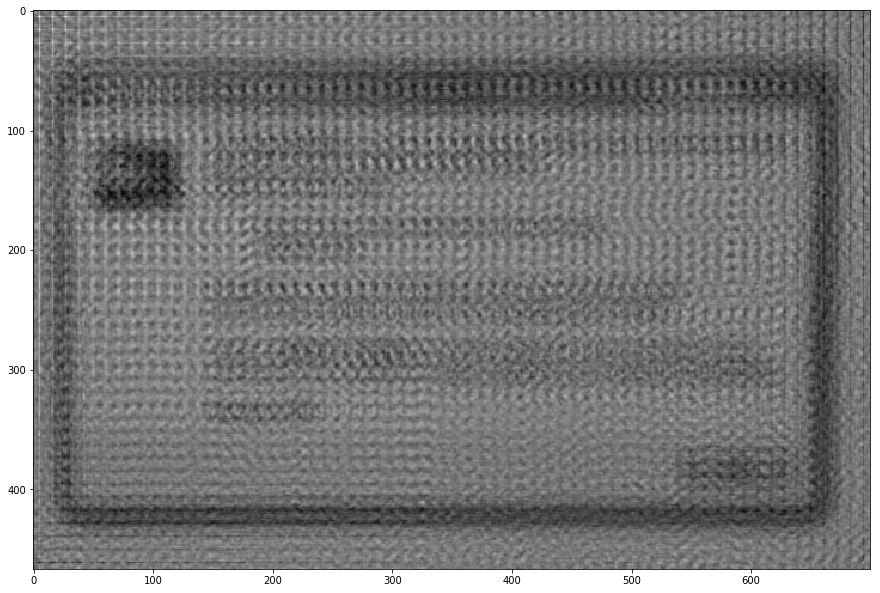

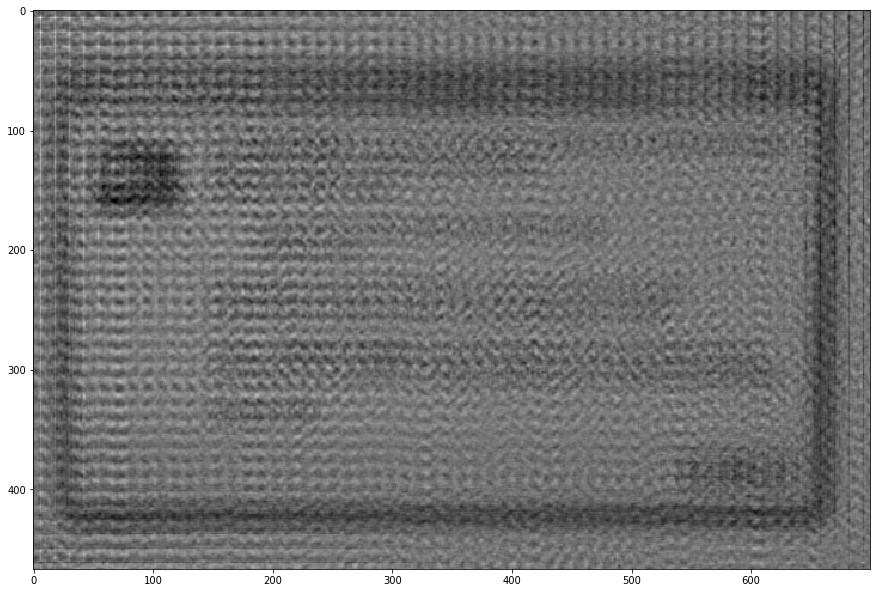

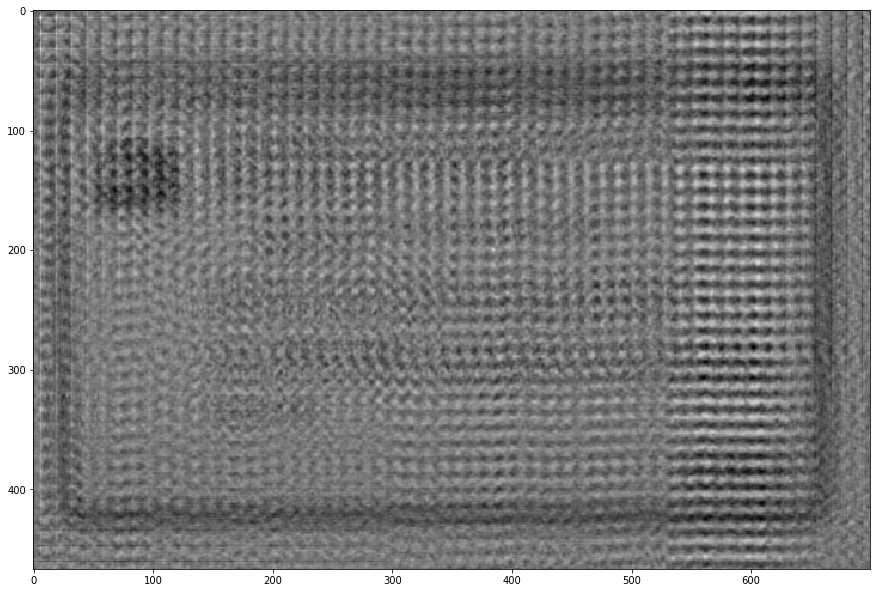

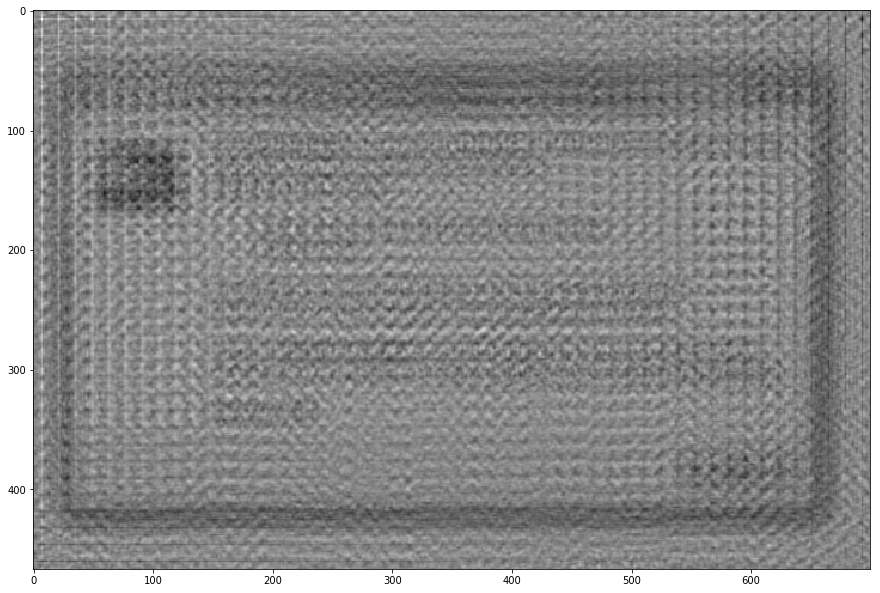

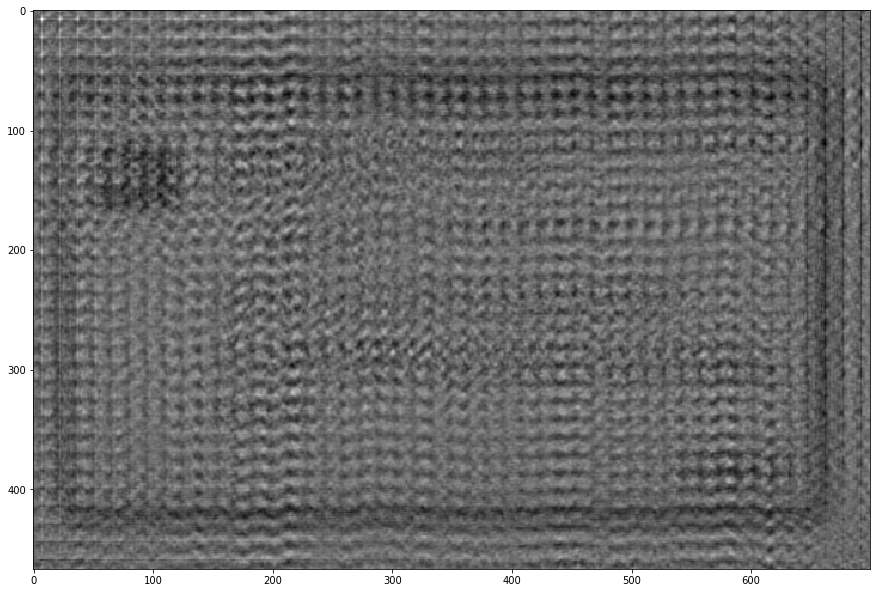

In [335]:
for i in dimlist:
    psf=np.ones([i,i])*(i*i)
    deconvolved,_=restoration.unsupervised_wiener(blur_red_channel,psf)
    
    plt.figure(figsize=[15,15])
    plt.imshow(deconvolved,cmap='gray')
    plt.show()

In [415]:
psf=x*y
deconvolved,_=restoration.unsupervised_wiener(blur_red_channel,psf)

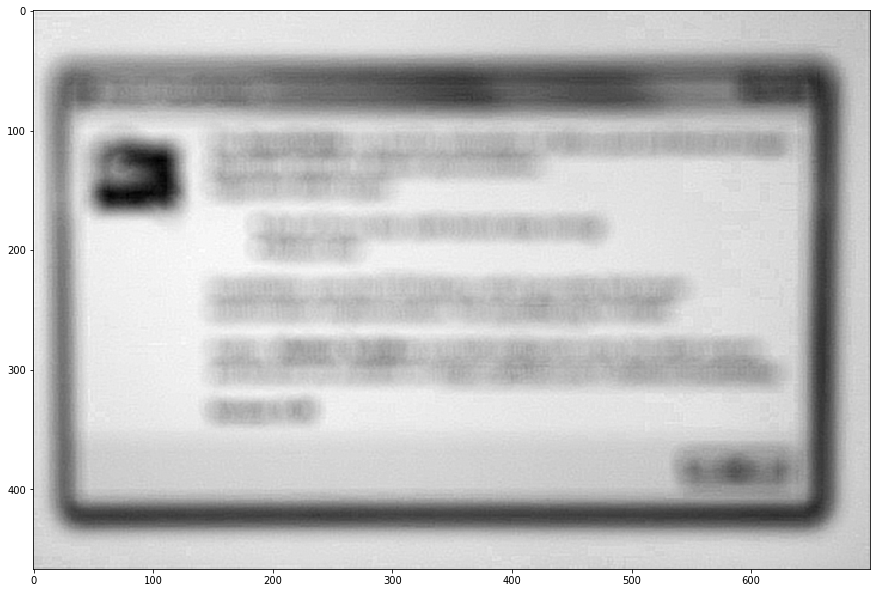

In [416]:
plt.figure(figsize=[15,15])
plt.imshow(deconvolved,cmap='gray')
plt.show()

In [411]:
x=np.arange(0,20)
gaussian1d=10*np.exp(-0.5*(x-10)**2)

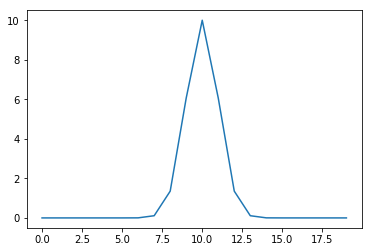

In [412]:
plt.plot(gaussian1d)
plt.show()


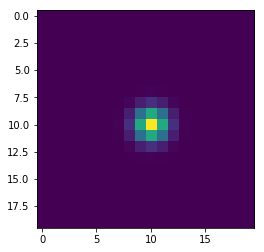

In [413]:
x,y=np.meshgrid(gaussian1d,gaussian1d)
plt.imshow(x*y)
plt.show()

In [414]:
source=PIL.Image.open("enterprise.jpg")

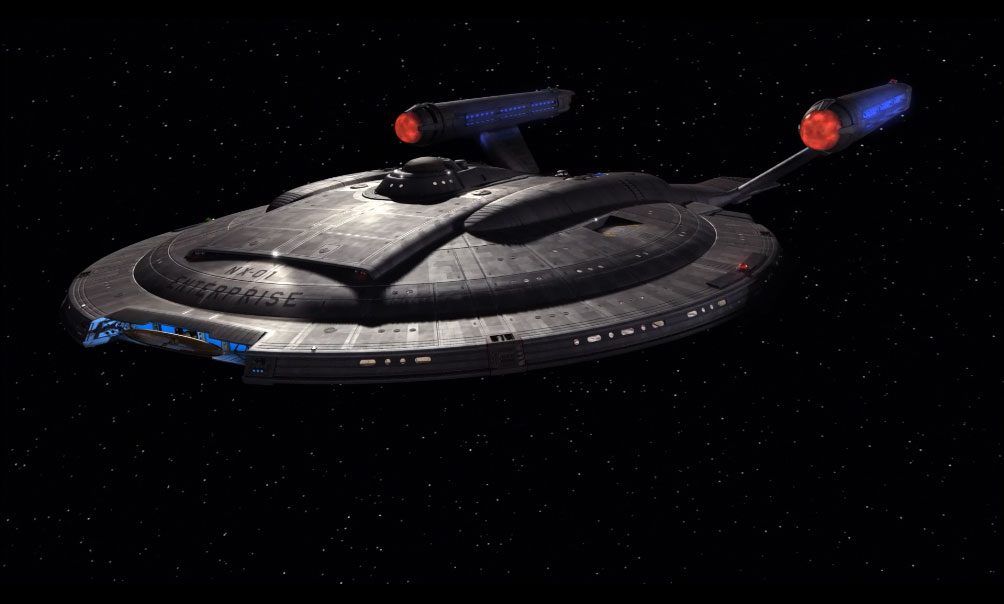

In [271]:
source

In [281]:
source=np.array(source)

In [282]:
source_red=np.zeros((source.shape[0],source.shape[1]))
source_red[:,:]=source[:,:,0]

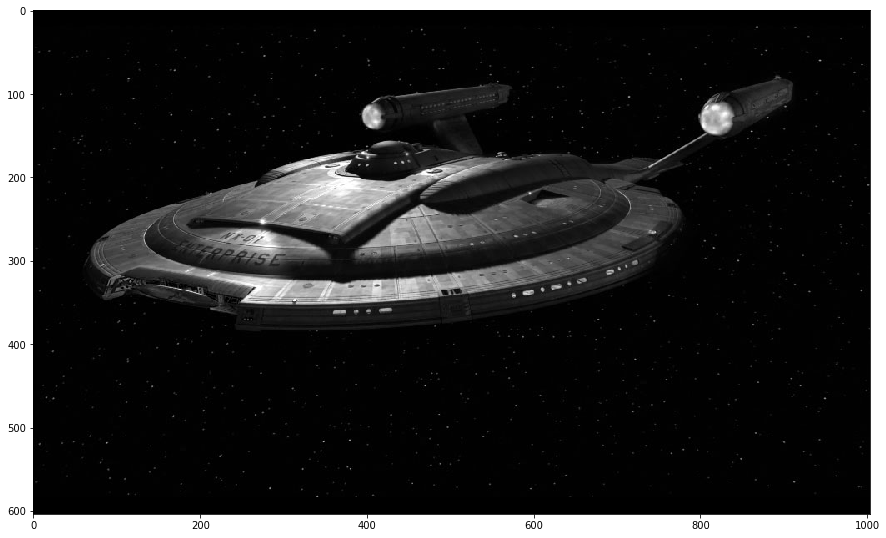

In [283]:
plt.figure(figsize=[15,15])
plt.imshow(source_red,cmap='gray')
plt.show()

In [284]:
def blur_me(source,kernel):
    blurred=scipy.signal.convolve2d(source,kernel)
    return blurred

In [293]:
psf=np.ones([15,15])/25

In [294]:
blur_red=blur_me(source_red,psf)
blur_red+=0.1*blur_red.std()*np.random.standard_normal(blur_red.shape)

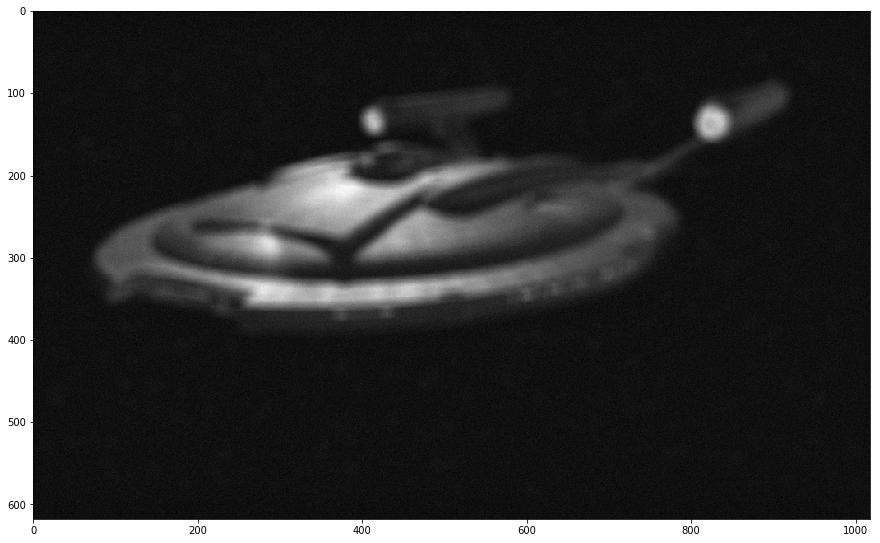

In [295]:
plt.figure(figsize=[15,15])
plt.imshow(blur_red,cmap='gray')
plt.show()

In [296]:
def deblur(blurred,pst,k):
    
    ffblurred=np.fft.fft2(blurred)
    H=np.fft.fft2(pst)
    
    return_me=((1)/(H))*((np.abs(H)**2)/(np.abs(H)**2+k))*ffblurred
    return_me+=0.1*return_me.std()*np.random_standard_normal(return_me.shape)
    return return_me

In [297]:
psfinv=1/psf


In [304]:
deconvolved,_=restoration.unsupervised_wiener(blur_red,np.ones([10,10])*100)

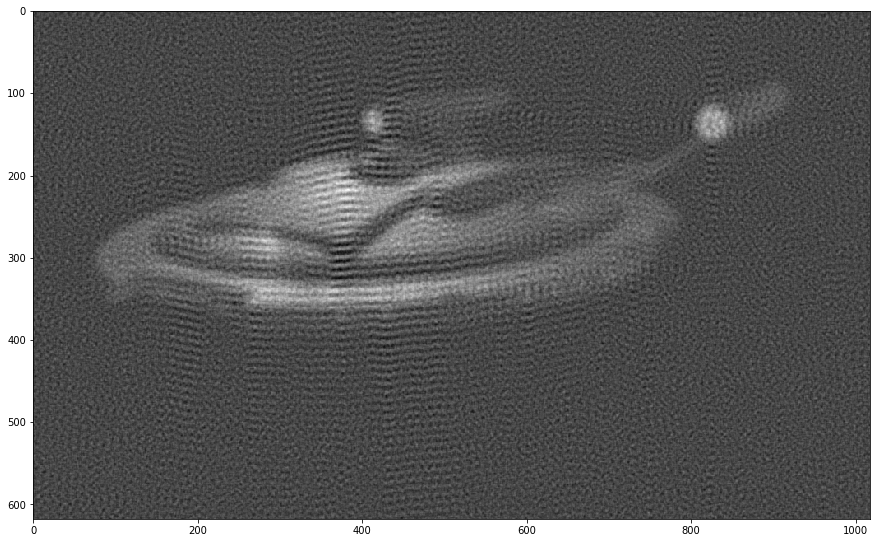

In [305]:
plt.figure(figsize=[15,15])
plt.imshow(deconvolved,cmap='gray')
plt.show()